In [10]:
import datetime as dt
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from scipy import stats
import sklearn.metrics
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns

Remember to run the above code as well to enable the imports.

Run the notebook below, enter the stock ticker symbol in the console that appears and press enter.

In [47]:
stock = input("Enter a stock ticker: ")
data = web.DataReader(stock, "yahoo")
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-24,46.049999,45.860001,45.889999,45.880001,2996300.0,39.090950
2017-11-27,45.990002,45.810001,45.880001,45.900002,5649200.0,39.107986
2017-11-28,46.150002,45.779999,45.990002,45.830002,8432800.0,39.048347
2017-11-29,45.820000,45.209999,45.770000,45.500000,16502100.0,38.767178
2017-11-30,45.840000,45.029999,45.139999,45.770000,17147600.0,39.316952
...,...,...,...,...,...,...
2022-11-15,61.450001,60.000000,61.130001,60.630001,13295800.0,60.630001
2022-11-16,61.029999,60.290001,60.790001,60.520000,14199500.0,60.520000
2022-11-17,60.740002,60.130001,60.189999,60.709999,11212600.0,60.709999


viewing -> KO / SMA_100


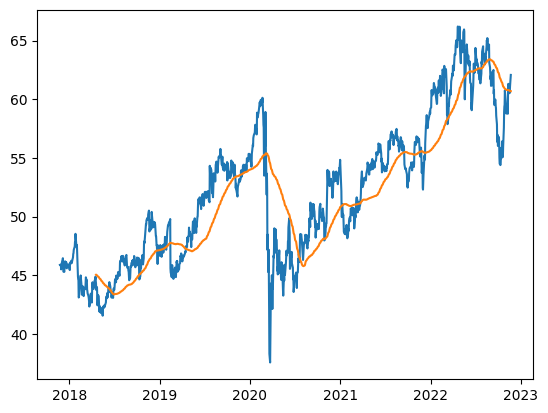

In [48]:
#SMA_100 & Basic Chart
data['SMA_100'] = ta.SMA(data['Close'], 100)
data.iloc[100:]

print("viewing -> " + stock, '/ SMA_100')
plt.plot(data['Close'])
plt.plot(data['SMA_100'])

In [49]:
#Correlation
print(".Corr values of " + stock)
data.corr()

.Corr values of KO


,High,Low,Open,Close,Volume,Adj Close,SMA_100
High,1.000000,0.996560,0.998046,0.997678,0.054937,0.986307,0.876743
Low,0.996560,1.000000,0.997323,0.998044,0.006435,0.982988,0.858874
Open,0.998046,0.997323,1.000000,0.995712,0.038956,0.983440,0.870890
Close,0.997678,0.998044,0.995712,1.000000,0.026713,0.985739,0.865559
Volume,0.054937,0.006435,0.038956,0.026713,1.000000,0.078755,0.150011
Adj Close,0.986307,0.982988,0.983440,0.985739,0.078755,1.000000,0.904947
SMA_100,0.876743,0.858874,0.870890,0.865559,0.150011,0.904947,1.000000


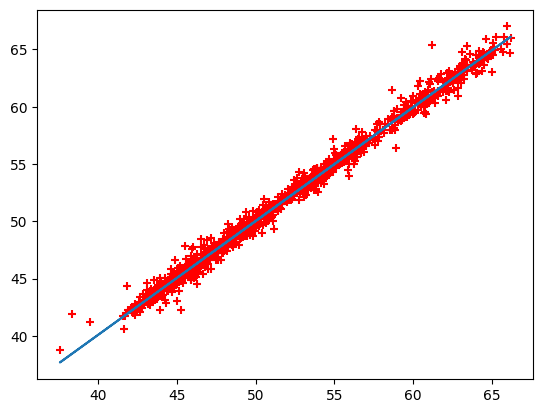

In [50]:
#linear regression of stock open & close
x = data.Close
y = data.Open

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

model = list(map(myfunc, x))

plt.scatter(x, y, color = 'red', marker ='+')
plt.plot(x, model)
plt.show()


In [51]:
#calculating relationship
slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

0.9957123030881933


In [52]:
#prediction of what the open (y) price will be according to the last closing (x) price.

slope, intercept, r, p, std_err = stats.linregress(x, y)

def mypredict(x):
    return slope * x + intercept

prediction = myfunc(data.Close[-1])

print(prediction)

62.01375822582199
